In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('./MBG-data-cleaned.csv')
df.head()

,created_at,full_text,favorite_count,quote_count,reply_count,retweet_count,tweet_url
0,Wed Oct 08 23:50:38 +0000 2025,Program Makan Bergizi Gratis (MBG) bukan cuma ...,0,0,0,0,https://x.com/undefined/status/197607277842936...
1,Wed Oct 08 23:50:00 +0000 2025,Langkah cepat dari Istana Presiden Prabowo Sub...,0,0,0,0,https://x.com/undefined/status/197607261960789...
2,Wed Oct 08 23:49:40 +0000 2025,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,0,0,0,0,https://x.com/undefined/status/197607253622089...
3,Wed Oct 08 23:49:01 +0000 2025,@wordsmithtobe @somexthread Pengen makan sehat...,0,0,0,0,https://x.com/undefined/status/197607237186295...
4,Wed Oct 08 23:48:28 +0000 2025,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,0,0,0,0,https://x.com/undefined/status/197607223054421...


In [4]:
df = df[['created_at', 'full_text', 'tweet_url']].copy()

In [5]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # hapus URL yang ada di data 'full_text'
    text = re.sub(r"@\w+", '', text)                     # hapus mention yang ada di data 'full_text'
    text = re.sub(r"#\w+", '', text)                     # hapus hashtag yang ada di data 'full_text'
    text = re.sub(r"_", '', text)                        # hapus underscore yang ada di data 'full_text'
    text = re.sub(r"[^\w\s]", '', text)                  # hapus tanda baca yang ada di data 'full_text'
    text = re.sub(r"[^\w\s%Rp]", '', text)               # hapus tanda baca kecuali % dan Rp
    text = text.lower().strip()                          # huruf kecil & hapus spasi berlebih
    return text

In [6]:
df['cleaned_full_text'] = df['full_text'].apply(clean_text)

df.head()

,created_at,full_text,tweet_url,cleaned_full_text
0,Wed Oct 08 23:50:38 +0000 2025,Program Makan Bergizi Gratis (MBG) bukan cuma ...,https://x.com/undefined/status/197607277842936...,program makan bergizi gratis mbg bukan cuma se...
1,Wed Oct 08 23:50:00 +0000 2025,Langkah cepat dari Istana Presiden Prabowo Sub...,https://x.com/undefined/status/197607261960789...,langkah cepat dari istana presiden prabowo sub...
2,Wed Oct 08 23:49:40 +0000 2025,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,https://x.com/undefined/status/197607253622089...,tiada hari tanpa keracunan mbg
3,Wed Oct 08 23:49:01 +0000 2025,@wordsmithtobe @somexthread Pengen makan sehat...,https://x.com/undefined/status/197607237186295...,pengen makan sehat aja dia ngarepin posyandu k...
4,Wed Oct 08 23:48:28 +0000 2025,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,https://x.com/undefined/status/197607223054421...,goblog ndhuwe dapur mbg piro pak


In [7]:
df['created_at'] = pd.to_datetime(df['created_at'])

df.head()

C:\Users\ramadhani.pratama\AppData\Local\Temp\ipykernel_11848\2377077675.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


,created_at,full_text,tweet_url,cleaned_full_text
0,2025-10-08 23:50:38+00:00,Program Makan Bergizi Gratis (MBG) bukan cuma ...,https://x.com/undefined/status/197607277842936...,program makan bergizi gratis mbg bukan cuma se...
1,2025-10-08 23:50:00+00:00,Langkah cepat dari Istana Presiden Prabowo Sub...,https://x.com/undefined/status/197607261960789...,langkah cepat dari istana presiden prabowo sub...
2,2025-10-08 23:49:40+00:00,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,https://x.com/undefined/status/197607253622089...,tiada hari tanpa keracunan mbg
3,2025-10-08 23:49:01+00:00,@wordsmithtobe @somexthread Pengen makan sehat...,https://x.com/undefined/status/197607237186295...,pengen makan sehat aja dia ngarepin posyandu k...
4,2025-10-08 23:48:28+00:00,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,https://x.com/undefined/status/197607223054421...,goblog ndhuwe dapur mbg piro pak


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   created_at         5011 non-null   datetime64[ns, UTC]
 1   full_text          5011 non-null   object             
 2   tweet_url          5011 non-null   object             
 3   cleaned_full_text  5011 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 156.7+ KB


In [9]:
df = df.dropna(subset='cleaned_full_text')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   created_at         5011 non-null   datetime64[ns, UTC]
 1   full_text          5011 non-null   object             
 2   tweet_url          5011 non-null   object             
 3   cleaned_full_text  5011 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 156.7+ KB


In [12]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

model_id = "Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

sentiment_pipeline = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    framework="pt",
    device=-1
)

text = "tiada hari tanpa keracunan mbg"
print(sentiment_pipeline(text))

Device set to use cpu


[{'label': 'Negative', 'score': 0.9948281645774841}]


In [16]:
text_test = df['cleaned_full_text'].values[4]
print(text_test)
print(sentiment_pipeline(text_test))

goblog ndhuwe dapur mbg piro pak
[{'label': 'Negative', 'score': 0.9761450886726379}]


In [17]:
from tqdm import tqdm

results = []

# Pastikan tqdm menampilkan progress
tqdm.pandas()

for text in tqdm(df["cleaned_full_text"].fillna("").values, desc="Analisis sentimen"):
    try:
        # Skip jika teks terlalu pendek (misal kosong)
        if len(text.strip()) == 0:
            results.append({"label": "unknown", "score": np.nan})
            continue

        result = sentiment_pipeline(text)
        results.append(result[0])
    except Exception as e:
        # Tangani error agar loop tidak berhenti
        results.append({"label": "error", "score": np.nan})
        print(f"Error pada teks: {text[:50]}... -> {e}")

# Masukkan hasil ke DataFrame
df["sentiment"] = [r["label"] for r in results]
df["score"] = [r["score"] for r in results]

df.head()

Analisis sentimen: 100%|██████████| 5011/5011 [06:01<00:00, 13.88it/s]


,created_at,full_text,tweet_url,cleaned_full_text,sentiment,score
0,2025-10-08 23:50:38+00:00,Program Makan Bergizi Gratis (MBG) bukan cuma ...,https://x.com/undefined/status/197607277842936...,program makan bergizi gratis mbg bukan cuma se...,Positive,0.997520
1,2025-10-08 23:50:00+00:00,Langkah cepat dari Istana Presiden Prabowo Sub...,https://x.com/undefined/status/197607261960789...,langkah cepat dari istana presiden prabowo sub...,Positive,0.835886
2,2025-10-08 23:49:40+00:00,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,https://x.com/undefined/status/197607253622089...,tiada hari tanpa keracunan mbg,Negative,0.994828
3,2025-10-08 23:49:01+00:00,@wordsmithtobe @somexthread Pengen makan sehat...,https://x.com/undefined/status/197607237186295...,pengen makan sehat aja dia ngarepin posyandu k...,Negative,0.991139
4,2025-10-08 23:48:28+00:00,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,https://x.com/undefined/status/197607223054421...,goblog ndhuwe dapur mbg piro pak,Negative,0.976145


C:\Users\ramadhani.pratama\AppData\Local\Temp\ipykernel_11848\2038455575.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


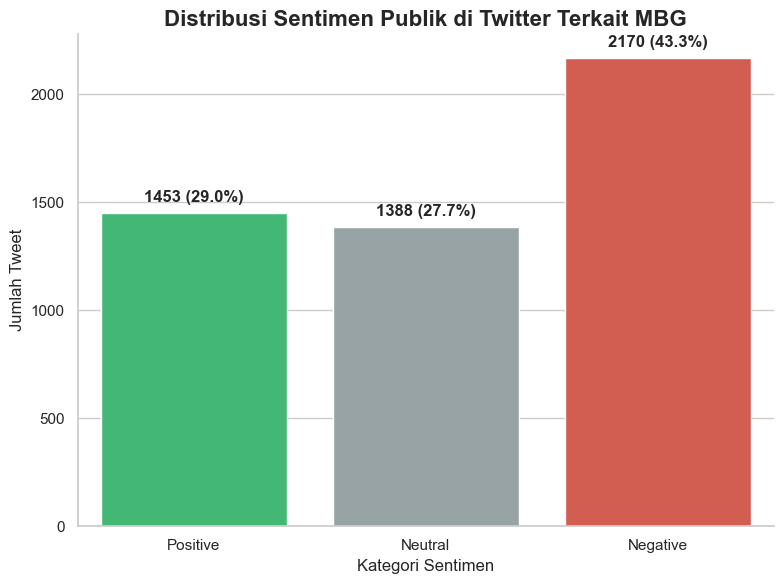

In [44]:
sns.set(style="whitegrid")

# Ensure consistent sentiment order (if exists in your dataset)
order = ["Positive", "Neutral", "Negative"]
sentiment_counts = df["sentiment"].value_counts().reindex(order)

# Colors based on emotional meaning
colors = {
    "Positive": "#2ecc71",  # green
    "Neutral": "#95a5a6",   # gray
    "Negative": "#e74c3c"   # red
}
mapped_colors = [colors[s] for s in sentiment_counts.index]

# Calculate percentages
total = sentiment_counts.sum()
percentages = (sentiment_counts / total) * 100

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=sentiment_counts.index, 
    y=sentiment_counts.values, 
    palette=mapped_colors
)

# Add count + percent labels above bars
for i, (count, pct) in enumerate(zip(sentiment_counts.values, percentages)):
    ax.text(i, count + total*0.01, 
            f"{count} ({pct:.1f}%)",
            ha='center', fontsize=12, fontweight="bold")

plt.title("Distribusi Sentimen Publik di Twitter Terkait MBG", fontsize=16, fontweight="bold")
plt.xlabel("Kategori Sentimen", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)

# Remove top and right borders for cleaner look
sns.despine()

plt.tight_layout()
plt.show()


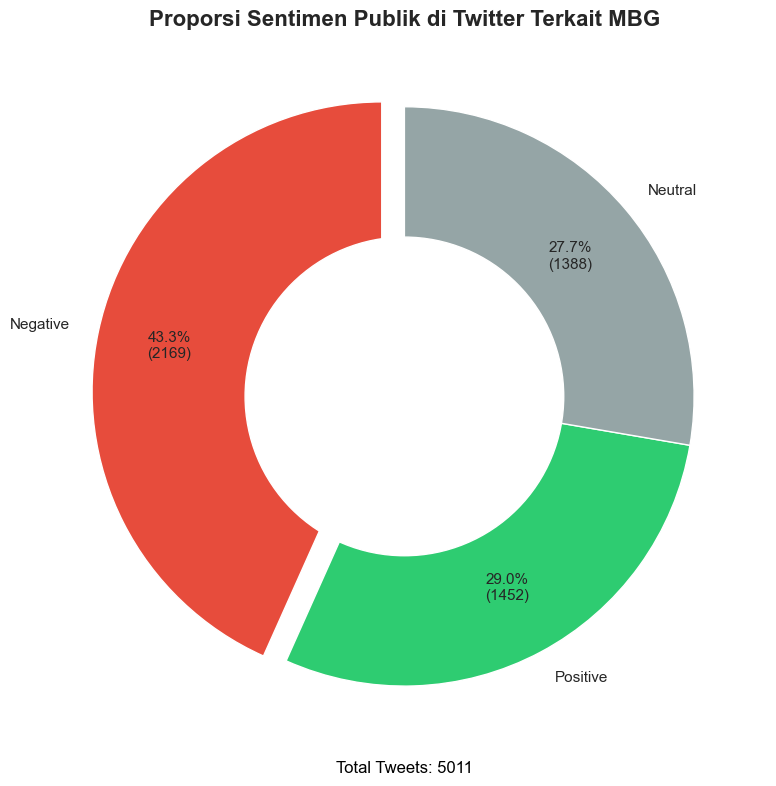

In [46]:
# Hitung jumlah sentiment
sentiment_counts = df["sentiment"].value_counts()

# Warna sesuai emosi
colors = {
    "Positive": "#2ecc71",  # green
    "Neutral": "#95a5a6",   # gray
    "Negative": "#e74c3c"   # red
}

# Map warna berdasarkan urutan sentiment_counts
mapped_colors = [colors[label] for label in sentiment_counts.index]

# Highlight sentiment paling banyak
explode = [0.08 if i == 0 else 0 for i in range(len(sentiment_counts))]

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    sentiment_counts,
    labels=[f"{label}" for label in sentiment_counts.index],
    autopct=lambda p: f"{p:.1f}%\n({int(p * sum(sentiment_counts) / 100)})",
    startangle=90,
    colors=mapped_colors,
    explode=explode,
    pctdistance=0.75,
    textprops={'fontsize': 11}
)

# Tambahkan judul
plt.title("Proporsi Sentimen Publik di Twitter Terkait MBG", fontsize=16, fontweight="bold")

# Buat tampilan pie jadi donut (lebih modern)
centre_circle = plt.Circle((0,0),0.55,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tambahkan keterangan total data
plt.text(0, -1.3, f"Total Tweets: {len(df)}", ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


Data preview:
 sentiment                  Negative  Neutral  Positive
created_at                                            
2025-10-07 00:00:00+00:00       680      332       285
2025-10-08 00:00:00+00:00      1490     1056      1168


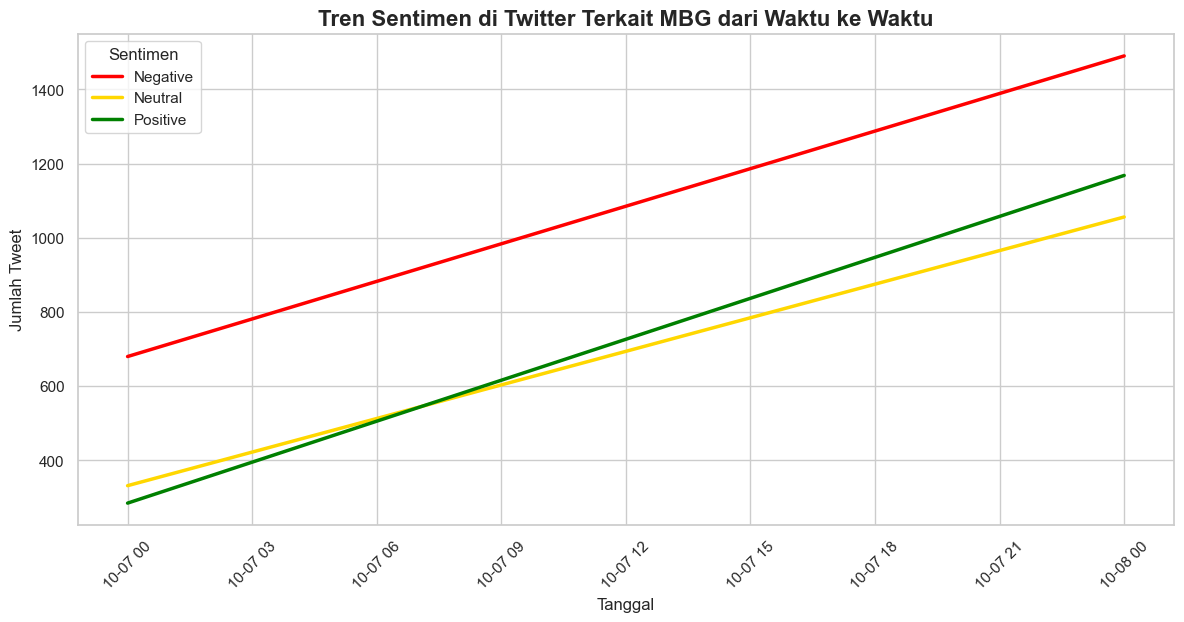

In [51]:
# Make sure created_at is datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['created_at'])

# Resample by day (after setting created_at as index)
daily_sentiment = (
    df.set_index('created_at')
      .groupby('sentiment')
      .resample('D')
      .size()
      .unstack(level=0)
      .fillna(0)
)

# Optional: smooth the data (only if enough data exists)
if len(daily_sentiment) > 7:
    daily_sentiment = daily_sentiment.rolling(window=7, center=True).mean()

# Check if data exists before plotting
print("Data preview:\n", daily_sentiment.head())

color_map = {
    "Positive": "green",
    "Negative": "red",
    "Neutral": "gold" 
}

plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

# Plot each sentiment line if column exists
for sentiment in daily_sentiment.columns:
    sns.lineplot(
        data=daily_sentiment,
        x=daily_sentiment.index,
        y=sentiment,
        label=sentiment,
        linewidth=2.5,
        color=color_map.get(sentiment, "blue")
    )

plt.title("Tren Sentimen di Twitter Terkait MBG dari Waktu ke Waktu", fontsize=16, weight='bold')
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)
plt.legend(title="Sentimen", loc="upper left", frameon=True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramadhani.pratama\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


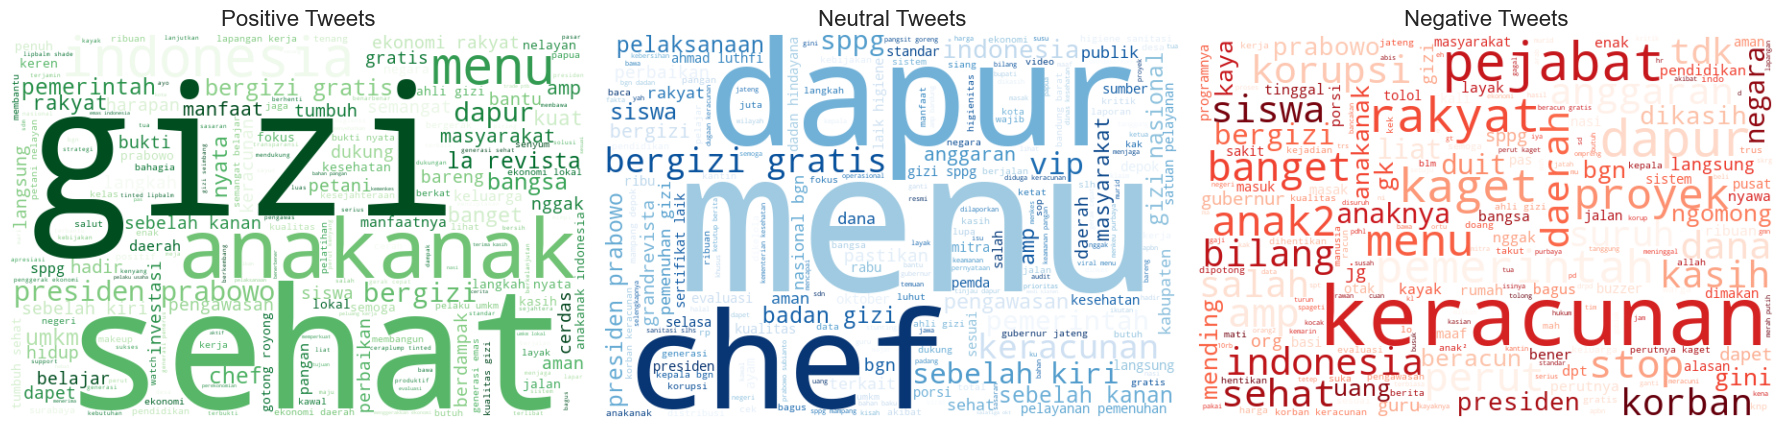

In [40]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Unduh stopwords jika belum
nltk.download('stopwords')

# Ambil stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Tambahkan stopword custom (kata umum yang tidak informatif di Twitter)
custom_stopwords = {"yg", "yang", "ada", "makan", "makanan", "pak", "banyak", "juga", "bisa", "kalau", "semua", "rt", "https", "co", "dan", "aja", "nih", "sih", "nya", "kalo", "mbg", "tuh", "dah", "dgn", "sampe", "yuk", "biar", "udh", "ya", "udah", "jd", "lu", "utk", "klo", "nih", "nih", "si", "loh", "deh", "kok", "gak", "ga", "rt", "dg", "tp", "sdh", "dl", "jgn", "krn", "bgt", "sm", "sy", "utk", "aja", "nih", "gitu", "saja", "lagi", "sama", "karna", "pake", "bikin", "buat", "nih", "yes", "gimana", "tu", "dll", "dst", "tapi", "atau", "karena", "seperti", "adalah", "dengan", "untuk", "dari", "ini", "itu", "saya", "kamu", "dia", "kami", "mereka", "gua", "gue", "gw", "tau", "coba", "pa", "dr", "kah", "program", "emang", "sekolah", "anak", "orang", "jadi", "lagi", "nih", "sih", "aja", "kok", "kan", "deh", "loh", "si"}
stop_words.update(custom_stopwords)

# Gabungkan tweet berdasarkan kategori sentiment
positive_tweets = " ".join(df[df["sentiment"] == "Positive"]["cleaned_full_text"].dropna())
neutral_tweets  = " ".join(df[df["sentiment"] == "Neutral"]["cleaned_full_text"].dropna())
negative_tweets = " ".join(df[df["sentiment"] == "Negative"]["cleaned_full_text"].dropna())

# Fungsi untuk membuat wordcloud dengan stopword
def generate_wordcloud(text, colormap):
    return WordCloud(
        width=600,
        height=400,
        background_color="white",
        stopwords=stop_words,
        colormap=colormap
    ).generate(text)

# Visualisasi WordCloud untuk setiap sentiment
plt.figure(figsize=(18, 6))

# Positive
plt.subplot(1, 3, 1)
wc_pos = generate_wordcloud(positive_tweets, "Greens")
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets", fontsize=16)

# Neutral
plt.subplot(1, 3, 2)
wc_neu = generate_wordcloud(neutral_tweets, "Blues")
plt.imshow(wc_neu, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Tweets", fontsize=16)

# Negative
plt.subplot(1, 3, 3)
wc_neg = generate_wordcloud(negative_tweets, "Reds")
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets", fontsize=16)

plt.tight_layout()
plt.show()


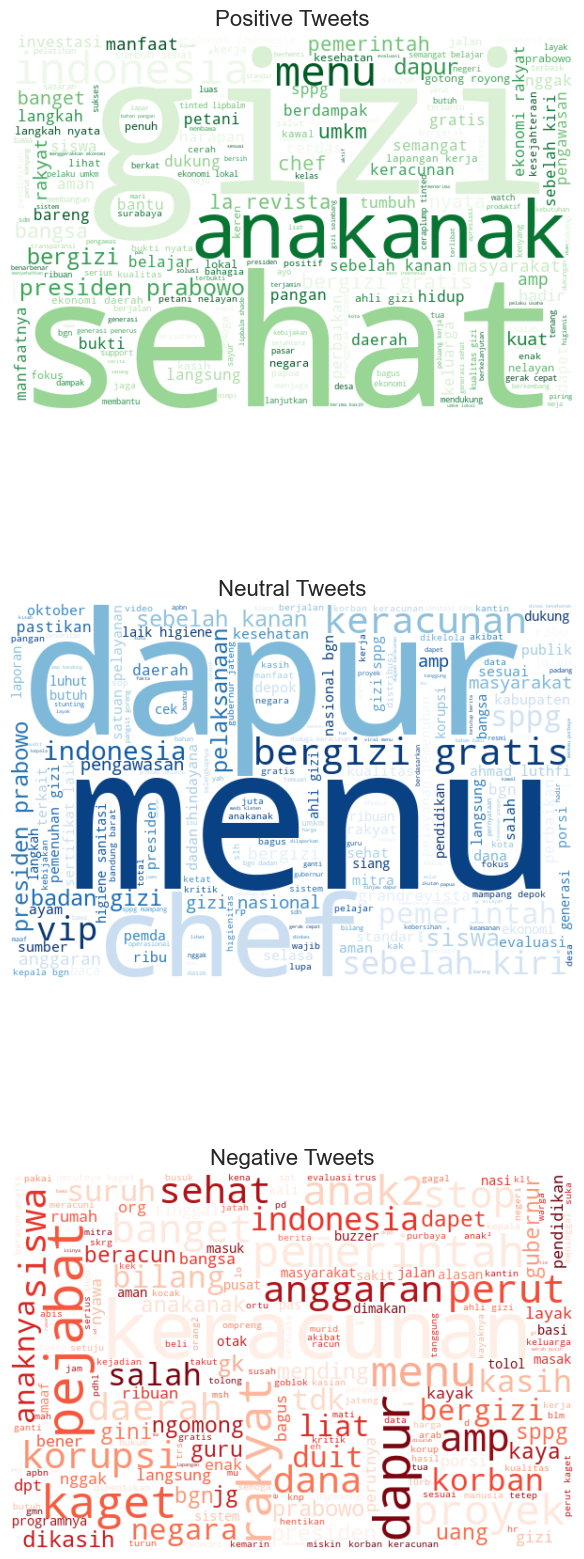

In [52]:
# Visualisasi WordCloud untuk setiap sentiment
plt.figure(figsize=(6, 18))

# Positive
plt.subplot(3, 1, 1)
wc_pos = generate_wordcloud(positive_tweets, "Greens")
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets", fontsize=16)

# Neutral
plt.subplot(3, 1, 2)
wc_neu = generate_wordcloud(neutral_tweets, "Blues")
plt.imshow(wc_neu, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Tweets", fontsize=16)

# Negative
plt.subplot(3, 1, 3)
wc_neg = generate_wordcloud(negative_tweets, "Reds")
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets", fontsize=16)

plt.tight_layout()
plt.show()

In [54]:
for col in df.columns:
    try:
        if pd.api.types.is_datetime64tz_dtype(df[col]):
            df[col] = df[col].dt.tz_convert(None)
    except Exception:
        # jika kolom bukan datetime atau terjadi masalah, lewati saja
        pass

# export hasil ke excel
df.to_excel('sentiment_analysis_mbg_result.xlsx', index=False)
print("Data berhasil diekspor ke file 'sentiment_analysis_mbg_result.xlsx'")

C:\Users\ramadhani.pratama\AppData\Local\Temp\ipykernel_11848\1098379520.py:3: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(df[col]):


Data berhasil diekspor ke file 'sentiment_analysis_mbg_result.xlsx'
